<div style="font-size:12pt; font-weight:bold;">ERGM Diagnostic Tools</div>
<div style="font-size:12pt;">Tyler Barrett & Jonathan H. Morgan, Ph.D.</div>
<div style="font-size:12pt;">23 April 2025</div>

<div style="font-size:12pt; font-weight:bold;">Preamble</div>

In [4]:
#   Clear Out Console Script
    cat("\014");

#   Options
    options(stringsAsFactors = FALSE);
    options(mc.cores = parallel::detectCores());

#   Packages
    library(tidyverse);
    library(statnet);
    library(psych);

#   Source Packages
    source("/workspace/ergm-based-diffusion-simulations/R_scripts/ergm_diagnostics_functions.R");

<div style="font-size:12pt; font-weight:bold;">Data Management</div>

In [11]:
#   Setting Work Directory to Demo Folder
    setwd("/workspace/ergm-based-diffusion-simulations/ERGM_diagnostics_demonstration/");

#   Loading the Networks
    synthetic_data <- readRDS("/workspace/data/synthetic_village_networks.rds");
    ls()

[1] "concordance_check_village"        "correlation_check_test"          
 [3] "degree_comparer"                  "ergm_attributes_check"           
 [5] "ergm_attributes_check_iterative"  "ergm_attributes_check_test"      
 [7] "ergm_concordance_check"           "ergm_concordance_check_iterative"
 [9] "ergm_correlation_check"           "ergm_correlation_check_iterative"
[11] "extract_correlated_pairs"         "pareto_plot"                     
[13] "synthetic_data"

In [16]:
#   Checking Data
#   synthetic_data should be a list of villages, and each village should contain a list of networks reflecting different types of relations.
    head(synthetic_data[[1]])

$free_time
 Network attributes:
  vertices = 2500 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 9865 
    missing edges= 0 
    non-missing edges= 9865 

 Vertex attribute names: 
    age education gender occupation vertex.names 

 Edge attribute names not shown 

$farm_help_provided
 Network attributes:
  vertices = 2500 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 5556 
    missing edges= 0 
    non-missing edges= 5556 

 Vertex attribute names: 
    age education gender occupation vertex.names 

 Edge attribute names not shown 

$farm_help_received
 Network attributes:
  vertices = 2500 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 6030 
    missing edges= 0 
    non-missing edges= 6030 

 Vertex attribute names: 
    age education gender occupation vertex.names 

 Edge attribute names not sho

<div style="font-size:12pt; font-weight:bold;">Network Evaluation</div>

The concordance check assesses whether different relations for a given village provide new information. Low concordance values indicate that the relations provide distinct information.

In [22]:
#   Conduct Concordance Checks on Synthetic Networks
    concordance_check_village <- ergm_concordance_check_iterative(synthetic_data)
    
#   Examine Results
    concordance_check_village$meta_network_1


network_1,network_2,concordance_value
<chr>,<chr>,<dbl>
free_time,farm_help_provided,0.0013617794
free_time,farm_help_received,0.0007549544
free_time,food_help_provided,0.0005345450
free_time,food_help_received,0.0003380663
farm_help_provided,farm_help_received,0.0009494217
farm_help_provided,food_help_provided,0.0007506803
farm_help_provided,food_help_received,0.0007632859
farm_help_received,food_help_provided,0.0006288743
farm_help_received,food_help_received,0.0015518028


In [25]:
#   Examine Results
    concordance_check_village[[2]]

network_1,network_2,concordance_value
<chr>,<chr>,<dbl>
free_time,farm_help_provided,0.0016065691
free_time,farm_help_received,0.0019730634
free_time,food_help_provided,0.0008781173
free_time,food_help_received,0.0009750909
farm_help_provided,farm_help_received,0.0014455688
farm_help_provided,food_help_provided,0.0009170105
farm_help_provided,food_help_received,0.0011604967
farm_help_received,food_help_provided,0.0013076169
farm_help_received,food_help_received,0.0006615215


The degree correlation check assesses whether a node's in and out degree centrality are correlated across relations. The user can specify a correlation threshold, and the function will output pairs with high levels of multicolinearity. The synthetic networks do not have high levels of multicolinearity, so the correlation threshold is set artificially low (0.2) in the example below to show the full functionality.

Warning message in ergm_correlation_check(data, corr_threshold):
“Outputted pairs have high levels of multicolinearity.”


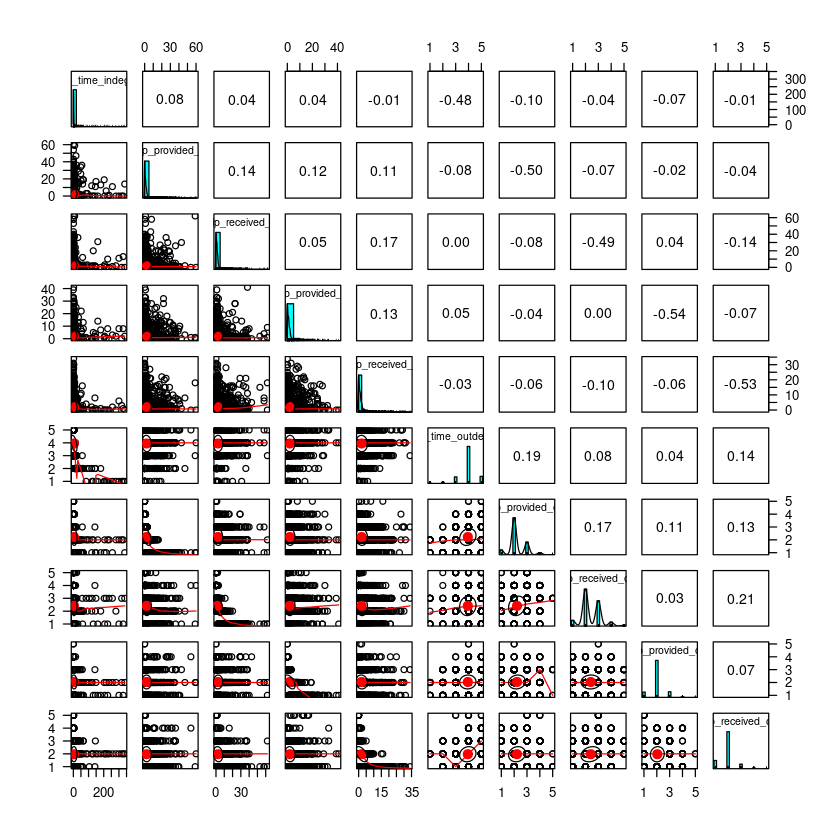

Warning message in ergm_correlation_check(data, corr_threshold):
“Outputted pairs have high levels of multicolinearity.”


,row,column,cor_value
,<chr>,<chr>,<dbl>
2,free_time_outdegree,free_time_indegree,-0.4826609
4,farm_help_provided_outdegree,farm_help_provided_indegree,-0.4997060
6,farm_help_received_outdegree,farm_help_received_indegree,-0.4865208
8,food_help_provided_outdegree,food_help_provided_indegree,-0.5371177
10,food_help_received_outdegree,food_help_received_indegree,-0.5341869
17,food_help_received_outdegree,farm_help_received_outdegree,0.2076493


,row,column,cor_value
,<chr>,<chr>,<dbl>
2,free_time_outdegree,free_time_indegree,-0.4783532
4,farm_help_provided_outdegree,farm_help_provided_indegree,-0.5110031
6,farm_help_received_outdegree,farm_help_received_indegree,-0.5084799
8,food_help_provided_outdegree,food_help_provided_indegree,-0.4599743
10,food_help_received_outdegree,food_help_received_indegree,-0.4928018


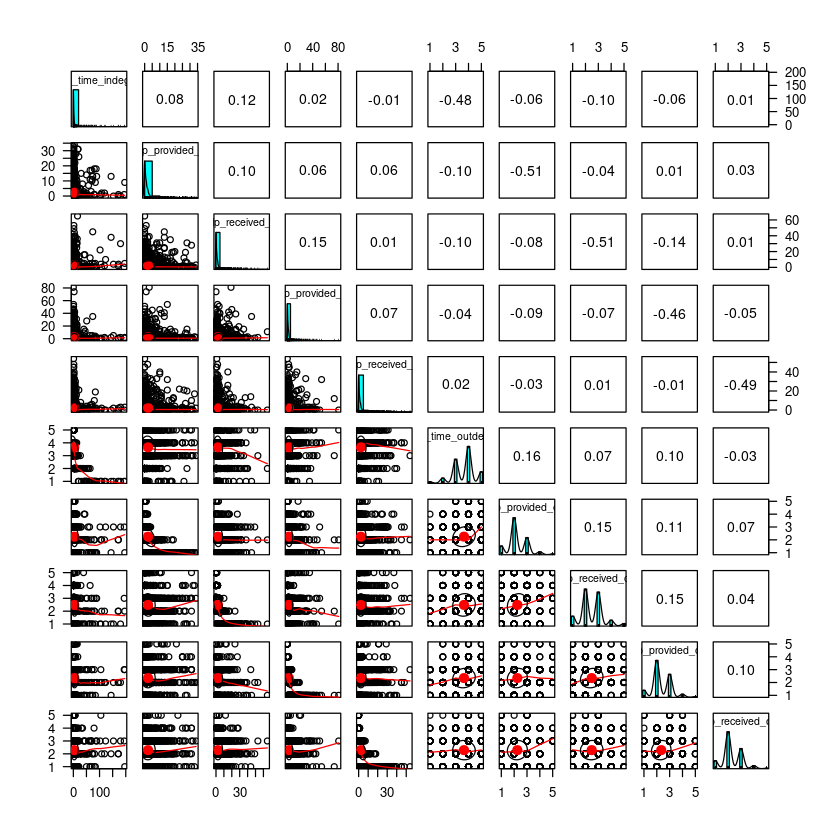

In [30]:
#   Conduct Degree Correlation Checks on Synthetic Networks
    correlation_check_test <- ergm_correlation_check_iterative(synthetic_data, 0.2)
    correlation_check_test$meta_network_1$correlated_pairs
    correlation_check_test$meta_network_2$correlated_pairs

The attributes check assesses whether there is enough variation in node attributes to include them in an ERGM. The outputted pareto plots show the number of nodes per category for a given attribute.

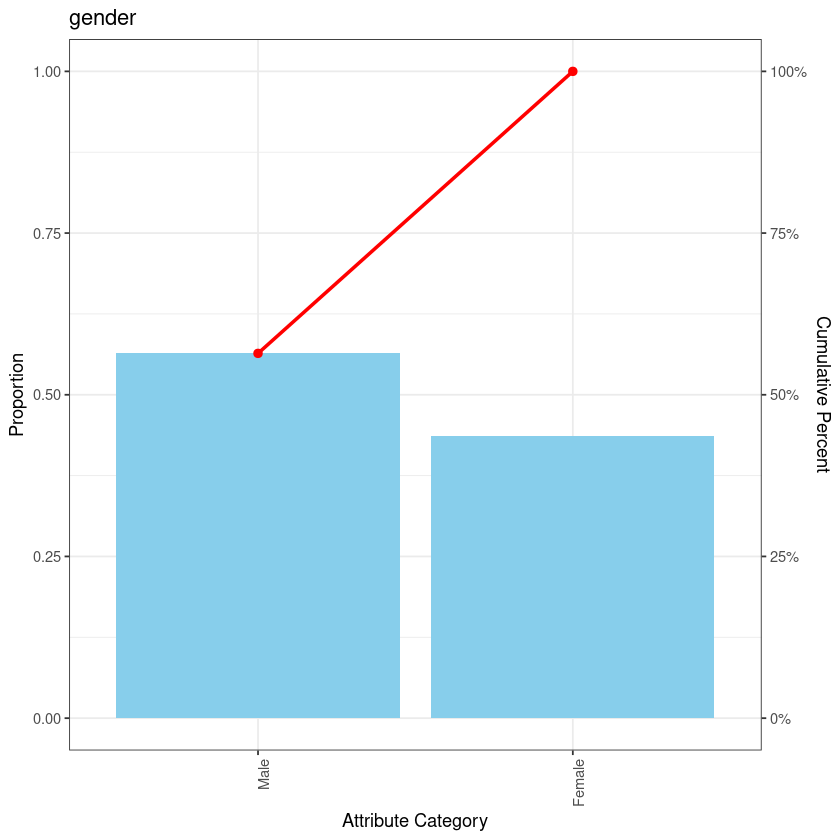

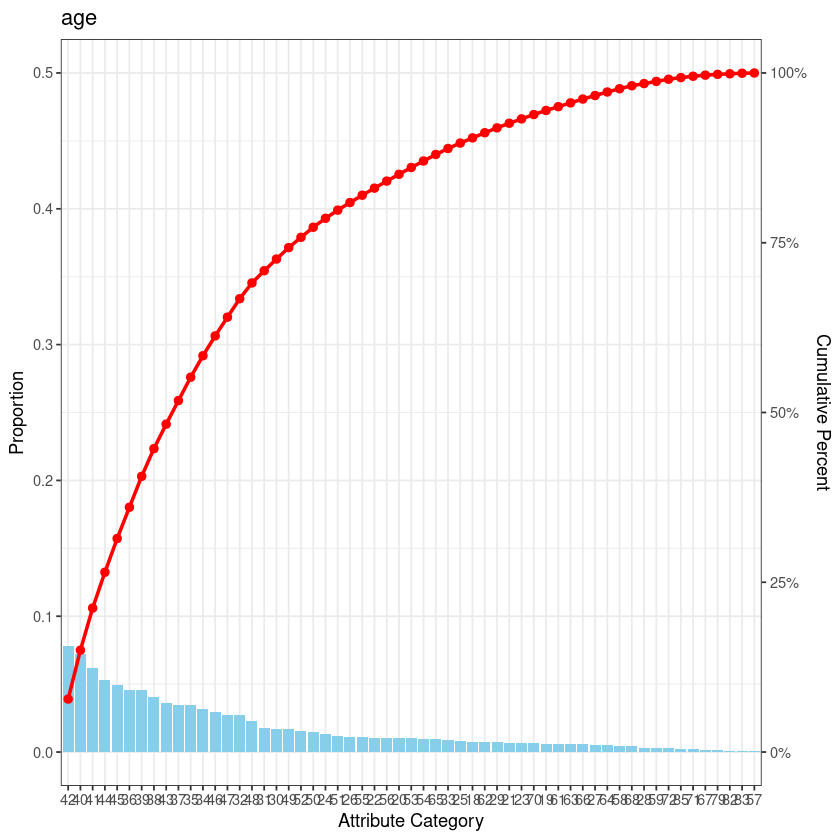

NULL

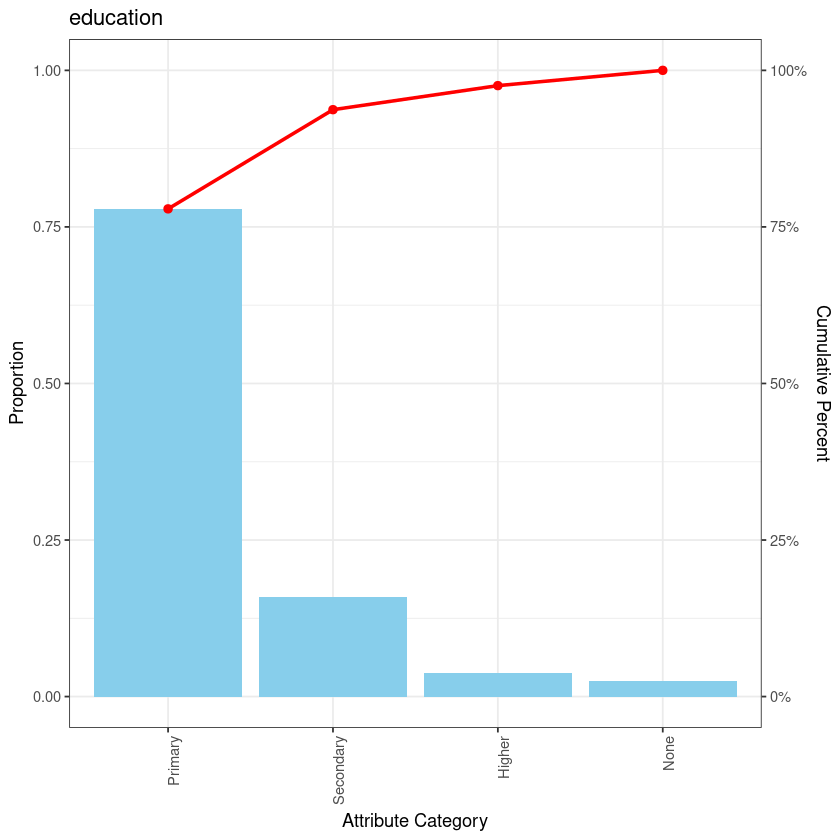

In [36]:
# Conduct Attribute Checks on Synthetic Networks
    ergm_attributes_check_test <-  ergm_attributes_check_iterative(synthetic_data)
    ergm_attributes_check_test$village_1$free_time$pareto_plots$gender
    ergm_attributes_check_test$village_1$free_time$pareto_plots$age
    ergm_attributes_check_test$village_1$free_time$pareto_plots$education
    ergm_attributes_check_test$village_1$free_time$pareto_plots$wealth